# Insurance Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## A) Dataset

In [2]:
df = pd.read_csv('insurance-data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(1338, 7)

## Comments
The dataset consisits of 7 columns and 1338 rows.

The are no NaN objects.

Only 1 duplicated item (Removed)

Numerical Columns:
age-bmi-children-charges

Non-Numerical Columns:
sex-smoker-region

## -------------------------------------------------------------------------------------

## B) Data Visualization

[Text(0.5, 1.0, 'Outliers: Charges')]

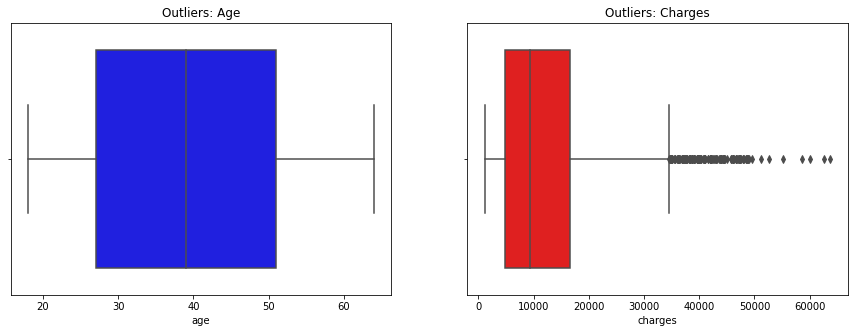

In [10]:
# detecting the outliers
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,5)

sns.boxplot(x='age', data=df, color='blue',ax=axes[0]).set(title='Outliers: Age')
sns.boxplot(x='charges', data=df, color='red',ax=axes[1]).set(title='Outliers: Charges')

In [12]:
#Old Aged Customers
df[df['age']>60]

,age,sex,bmi,children,smoker,region,charges
11,62,female,26.290,0,yes,southeast,27808.72510
26,63,female,23.085,0,no,northeast,14451.83515
33,63,male,28.310,0,no,northwest,13770.09790
36,62,female,32.965,3,no,northwest,15612.19335
62,64,male,24.700,1,no,northwest,30166.61817
...,...,...,...,...,...,...,...
1301,62,male,30.875,3,yes,northwest,46718.16325
1321,62,male,26.695,0,yes,northeast,28101.33305
1322,62,male,38.830,0,no,southeast,12981.34570
1325,61,male,33.535,0,no,northeast,13143.33665


In [14]:
#Customers with high charges
df[df['charges']>60000]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


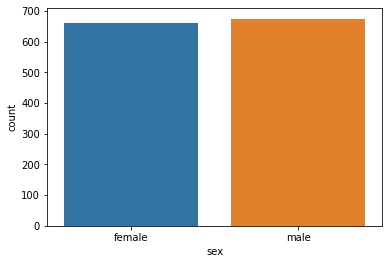

In [15]:
# Differentiating between customers according to gender
sns.countplot(x='sex',data=df)

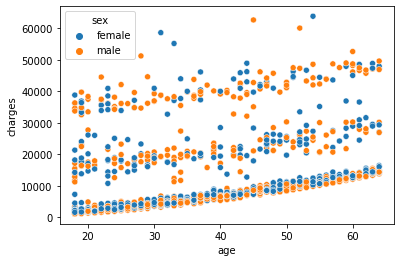

In [16]:
# Paid charges relation with age anf gender
sns.scatterplot(x='age',y='charges',hue='sex',data=df)

In [17]:
# Correlation between dataset columns
df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


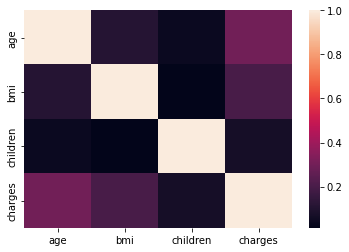

In [18]:
#Visualizing the correlation between the features:
sns.heatmap(df.corr())

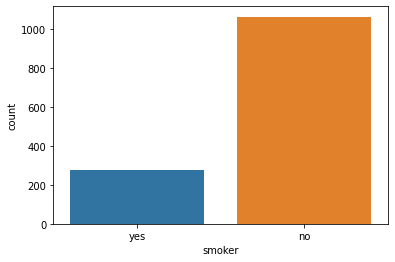

In [26]:
#Low smoking rate
sns.countplot(data=df,x='smoker')

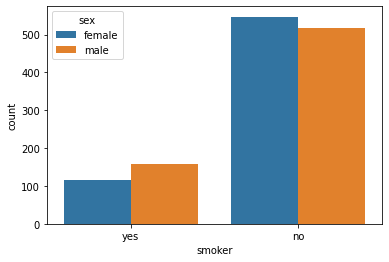

In [19]:
#Higher Smoking Rate at males
sns.countplot(data=df,x='smoker',hue='sex')

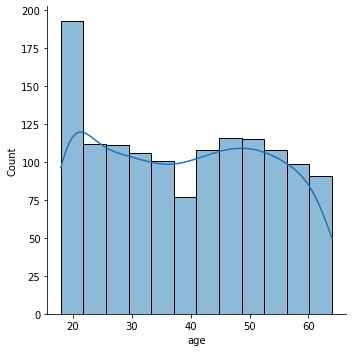

In [20]:
#Customers age vary from 20 to 60
sns.displot(df.age,kde=True)

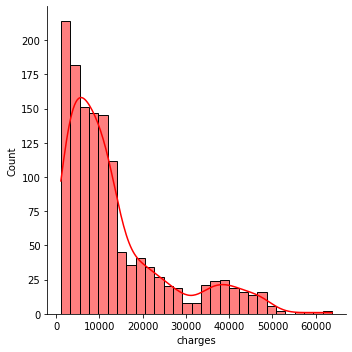

In [21]:
#Histogram for paid charges
sns.displot(df.charges,kde=True,color='red')

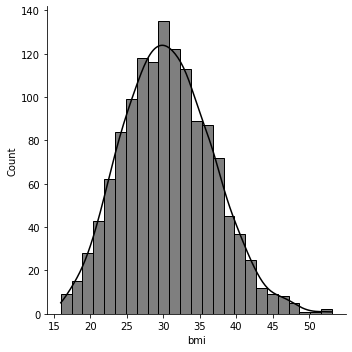

In [23]:
#Customer BMI
sns.displot(df.bmi,kde=True,color='black')

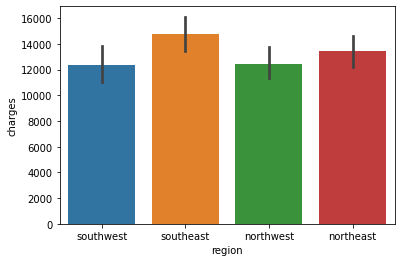

In [24]:
#Paid Charges according to region
sns.barplot(data = df, y='charges',x='region')

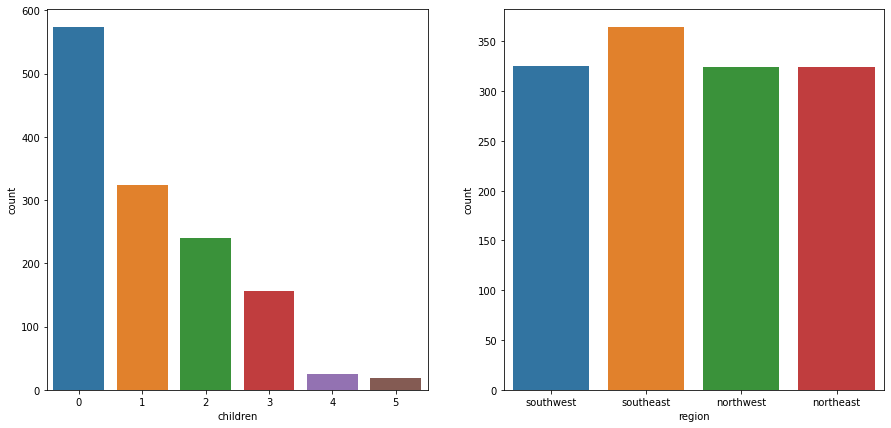

In [30]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,7)

sns.countplot(data=df,x='children',ax=axes[0])
sns.countplot(data=df,x='region',ax=axes[1])
#Low percentage of customers with 4 or more children

In [32]:
df[df['children']>4]

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687.79700
71,31,male,28.500,5,no,northeast,6799.45800
166,20,female,37.000,5,no,southwest,4830.63000
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
438,52,female,46.750,5,no,southeast,12592.53450
568,49,female,31.900,5,no,southwest,11552.90400
640,33,male,42.400,5,no,southwest,6666.24300
877,33,male,33.440,5,no,southeast,6653.78860
932,46,male,25.800,5,no,southwest,10096.97000
